# Supervised & Unsupervised Learning

## Customer Spending and Behaviour Patterns - Streaming Services

### Identifying Variable Types

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("Streaming.csv")  # Replace "file.csv" with your actual file path

(df.dtypes)

Customer_ID                object
Age                       float64
Gender                     object
Subscription_Length         int64
Region                     object
Payment_Method             object
Support_Tickets_Raised      int64
Satisfaction_Score        float64
Discount_Offered          float64
Last_Activity               int64
Monthly_Spend             float64
Churned                     int64
dtype: object

### Finding Missing/blank values

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("Streaming.csv") 

missing_values = (df.isnull().sum())
print(missing_values)

Customer_ID                 0
Age                       500
Gender                      0
Subscription_Length         0
Region                      0
Payment_Method              0
Support_Tickets_Raised      0
Satisfaction_Score        500
Discount_Offered            0
Last_Activity               0
Monthly_Spend               0
Churned                     0
dtype: int64


## Data cleaning, filling blank spaces with NaN - Filling Age

In [4]:
# data cleaning, filling blank spaces with NaN - Filling Age

import pandas as pd

# Load your dataset (replace 'streaming_data.csv' with your actual file)
df = pd.read_csv('Streaming.csv')

# Calculate the mean of the 'Age' column
mean_age = df['Age'].mean()

# Fill missing values in 'Age' with the mean value (using direct assignment)
df['Age'] = df['Age'].fillna(mean_age)

# Verify that there are no missing values left
print(df['Age'].isnull().sum())

0


In [9]:
# data cleaning, filling blank spaces with NaN - Filling Satiscation score

import pandas as pd

# Load your dataset (replace 'streaming_data.csv' with your actual file)
df = pd.read_csv('Streaming.csv')

# Calculate the mean of the 'Satisfaction_Score' column
mean_age = df['Satisfaction_Score'].mean()

# Fill missing values in 'Satisfaction_Score' with the mean value (using direct assignment)
df['Satisfaction_Score'] = df['Satisfaction_Score'].fillna(mean_age)

# Verify that there are no missing values left
print(df['Satisfaction_Score'].isnull().sum())

0


In [18]:
# Checking blank values

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Streaming.csv")

missing_values = df.isnull().sum()
print("missing_values", missing_values)

mean_value = df[["Age", "Satisfaction_Score"]].mean()
print("mean_value", mean_value)

# df["Age"].fillna(mean_value["Age"], inplace = True)
# df["Satisfaction_Score"].fillna(mean_value["Satisfaction_Score"], inplace = True)

df = df.fillna({"Age": mean_value["Age"], "Satisfaction_Score": mean_value["Satisfaction_Score"]})

after_filling = df.isnull().sum()
print("filling_missed values", after_filling)

missing_values Customer_ID                 0
Age                       500
Gender                      0
Subscription_Length         0
Region                      0
Payment_Method              0
Support_Tickets_Raised      0
Satisfaction_Score        500
Discount_Offered            0
Last_Activity               0
Monthly_Spend               0
Churned                     0
dtype: int64
mean_value Age                   43.582222
Satisfaction_Score     5.546000
dtype: float64
filling_missed values Customer_ID               0
Age                       0
Gender                    0
Subscription_Length       0
Region                    0
Payment_Method            0
Support_Tickets_Raised    0
Satisfaction_Score        0
Discount_Offered          0
Last_Activity             0
Monthly_Spend             0
Churned                   0
dtype: int64


### Filling blank cells with mean value

In [5]:
# filling blank cells with mean value
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Streaming.csv")

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Satisfaction_Score"].fillna(df["Satisfaction_Score"].median(), inplace=True)

df.head()

C:\Users\123\AppData\Local\Temp\ipykernel_24604\3128348132.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\123\AppData\Local\Temp\ipykernel_24604\3128348132.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
4,CUST000005,60.0,Male,6,East,Credit Card,2,6.0,13.18,65,45.97,0


### Heat Map

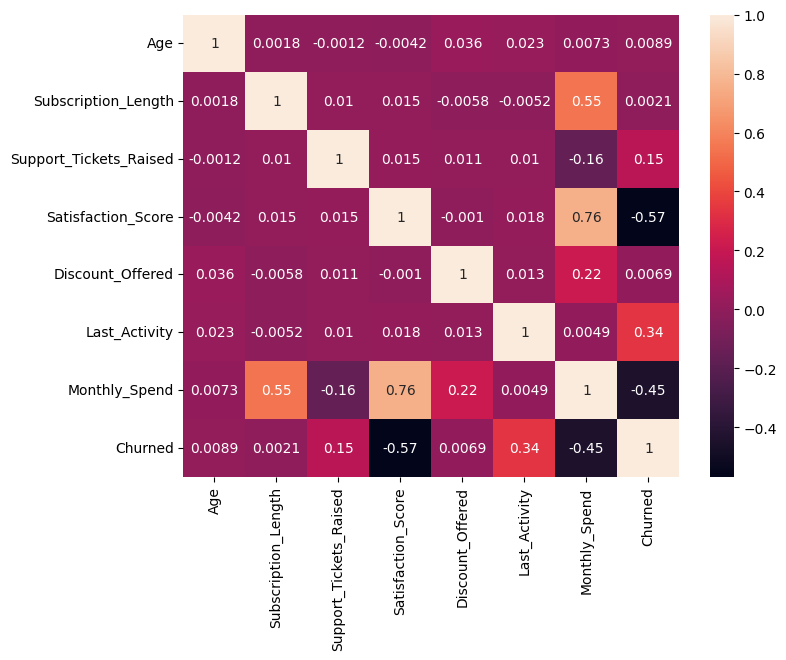

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Streaming.csv")

column_list = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity", "Monthly_Spend", "Churned"]
plt.figure(figsize=(8, 6))

sns.heatmap(df[column_list].corr(), annot=True)
plt.show()

# Supervised learning Mode

## Question A

## Single Input Variable vs Monthly Spending - Linear Regression

### Age vs Monthly spending

In [42]:
# Age vs monthly spending - Linear Regression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Streaming.csv")

df["Age"].fillna(df["Age"].median(), inplace=True)


# Extract the input feature# 7
x = df["Age"]
 # Extract the output feature
y = df["Monthly_Spend"]
 # The sklearn models we will be using expect
 # the input, x, to be in the form of a
 # 2-dimensional array. However, when we extract
 # only a single input feature the result is
 # 1-dimensional. We therefore need to convert
 # x to a numpy array and re-shape it so that
 # it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# We need to import the train_test_split function
 # from the sklearn library
from sklearn.model_selection import train_test_split
 # We can now split the x and y arrays between the
 # train and test sets. In this example, we will use
 # 20% of the data for the testing set, and the
 # remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
 # Lets check the size of the training and
 # testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set.\n" % (len(x_test), ))

# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation in x, using the training  dataset.
scale.fit(x_train)
# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# We need to import the LinearRegression model from the sklearn library.

from sklearn.linear_model import LinearRegression
# Create an instance of the model.
spend_linear = LinearRegression()
# Fit the model to the training data.
spend_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
gradient = spend_linear.coef_[0]
intercept = spend_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Import the metrics from the sklearn library.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
month_spend = spend_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, month_spend)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, month_spend)
# The root mean squared error is just the
# square root of the mean squared error
# that we calculated above.
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, month_spend)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)
print( "This data is for input 'Age' and output against 'Monthly Spend'\n")
#print("-" * 20 + '\n')

There are 4000 data points in the training set.
There are 1000 data points in the testing set.

gradient:  0.00016149481295991703
intercept:  46.562889999999996
Mean absolute error:  7.641335988049988
Mean squared error:  90.4813712947175
Root mean squared error:  9.51216964181766
R2:  -0.0008940218086892493
This data is for input 'Age' and output against 'Monthly Spend'



C:\Users\123\AppData\Local\Temp\ipykernel_28000\4021583531.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


### Subscription_Length vs Monthly Spending

In [41]:
# Subscription_Length
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Streaming.csv")



# Extract the input feature# 7
x = df["Subscription_Length"]
 # Extract the output feature
y = df["Monthly_Spend"]
 # The sklearn models we will be using expect
 # the input, x, to be in the form of a
 # 2-dimensional array. However, when we extract
 # only a single input feature the result is
 # 1-dimensional. We therefore need to convert
 # x to a numpy array and re-shape it so that
 # it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# We need to import the train_test_split function
 # from the sklearn library
from sklearn.model_selection import train_test_split
 # We can now split the x and y arrays between the
 # train and test sets. In this example, we will use
 # 20% of the data for the testing set, and the
 # remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
 # Lets check the size of the training and
 # testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set.\n" % (len(x_test), ))

# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation in x, using the training  dataset.
scale.fit(x_train)
# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# We need to import the LinearRegression model from the sklearn library.

from sklearn.linear_model import LinearRegression
# Create an instance of the model.
spend_linear = LinearRegression()
# Fit the model to the training data.
spend_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
gradient = spend_linear.coef_[0]
intercept = spend_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Import the metrics from the sklearn library.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
month_spend = spend_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, month_spend)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, month_spend)
# The root mean squared error is just the
# square root of the mean squared error
# that we calculated above.
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, month_spend)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)
print( "This data is for input 'Subscription_Length' and output against 'Monthly Spend'\n")
#print("-" * 20 + '\n')

There are 4000 data points in the training set.
There are 1000 data points in the testing set.

gradient:  5.239445422563952
intercept:  46.562889999999996
Mean absolute error:  6.642846985599881
Mean squared error:  64.82782933324118
Root mean squared error:  8.051573096807926
R2:  0.28288236685617896
This data is for input 'Subscription_Length' and output against 'Monthly Spend'



### Support_Tickets_Raised vs Monthly Spending

In [43]:
# Support_Tickets_Raised
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Streaming.csv")



# Extract the input feature# 7
x = df["Support_Tickets_Raised"]
 # Extract the output feature
y = df["Monthly_Spend"]
 # The sklearn models we will be using expect
 # the input, x, to be in the form of a
 # 2-dimensional array. However, when we extract
 # only a single input feature the result is
 # 1-dimensional. We therefore need to convert
 # x to a numpy array and re-shape it so that
 # it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# We need to import the train_test_split function
 # from the sklearn library
from sklearn.model_selection import train_test_split
 # We can now split the x and y arrays between the
 # train and test sets. In this example, we will use
 # 20% of the data for the testing set, and the
 # remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
 # Lets check the size of the training and
 # testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set.\n" % (len(x_test), ))

# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation in x, using the training  dataset.
scale.fit(x_train)
# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# We need to import the LinearRegression model from the sklearn library.

from sklearn.linear_model import LinearRegression
# Create an instance of the model.
spend_linear = LinearRegression()
# Fit the model to the training data.
spend_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
gradient = spend_linear.coef_[0]
intercept = spend_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Import the metrics from the sklearn library.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
month_spend = spend_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, month_spend)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, month_spend)
# The root mean squared error is just the
# square root of the mean squared error
# that we calculated above.
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, month_spend)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)
print( "This data is for input 'Support_Tickets_Raised' and output against 'Monthly Spend'\n")
#print("-" * 20 + '\n')

There are 4000 data points in the training set.
There are 1000 data points in the testing set.

gradient:  -1.5847433162272913
intercept:  46.562889999999996
Mean absolute error:  7.600180742380477
Mean squared error:  88.79502699716902
Root mean squared error:  9.423111322549948
R2:  0.01776011552340051
This data is for input 'Support_Tickets_Raised' and output against 'Monthly Spend'



### Satisfaction_Score vs Monthly Spending - with graph

C:\Users\123\AppData\Local\Temp\ipykernel_33112\1566548668.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Satisfaction_Score"].fillna(df["Satisfaction_Score"].median(), inplace=True)


gradient:  6.851193919133857
intercept:  46.562889999999996
Mean absolute error:  5.1603353681596476
Mean squared error:  42.084398812639314
Root mean squared error:  6.487248940239562
R2:  0.5344674535735892
This data is for input 'Satisfaction_Score' and output against 'Monthly Spend'



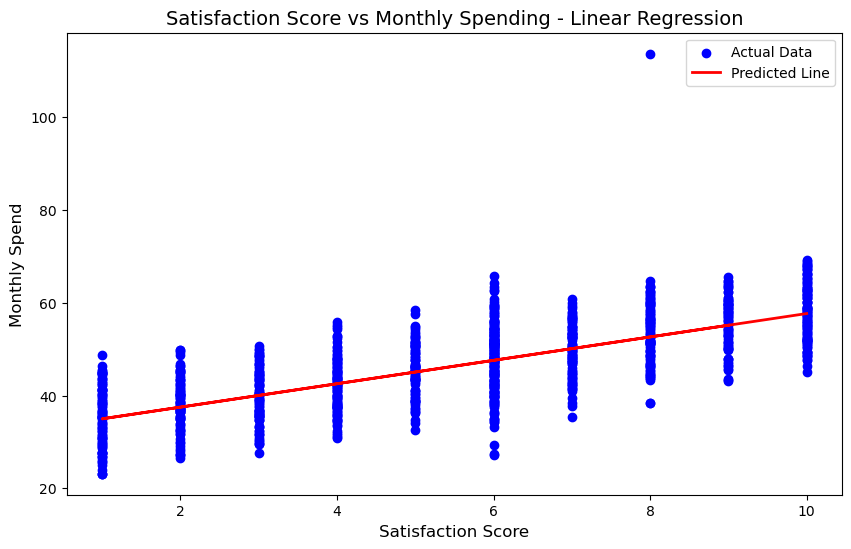

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("Streaming.csv")

# Handle missing values
df["Satisfaction_Score"].fillna(df["Satisfaction_Score"].median(), inplace=True)

# Extract the input and output features
x = df["Satisfaction_Score"]
y = df["Monthly_Spend"]

# Convert x to a 2D array
x = x.to_numpy().reshape(-1, 1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create and train the linear regression model
spend_linear = LinearRegression()
spend_linear.fit(x_train_scaled, y_train)

# Get model coefficients
gradient = spend_linear.coef_[0]
intercept = spend_linear.intercept_

# Print the coefficients
print("gradient: ", gradient)
print("intercept: ", intercept)

# Predict the outputs for the test set
month_spend = spend_linear.predict(x_test_scaled)

# Calculate the metrics
mean_abs = mean_absolute_error(y_test, month_spend)
mean_squared = mean_squared_error(y_test, month_spend)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, month_spend)

# Print metrics
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)
print("This data is for input 'Satisfaction_Score' and output against 'Monthly Spend'\n")

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Plot the predicted line of best fit
plt.plot(x_test, month_spend, color='red', linewidth=2, label='Predicted Line')

# Adding titles and labels
plt.title('Satisfaction Score vs Monthly Spending - Linear Regression', fontsize=14)
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Monthly Spend', fontsize=12)

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [45]:
# Satisfaction_Score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Streaming.csv")

df["Satisfaction_Score"].fillna(df["Satisfaction_Score"].median(), inplace=True)


# Extract the input feature# 7
x = df["Satisfaction_Score"]
 # Extract the output feature
y = df["Monthly_Spend"]
 # The sklearn models we will be using expect
 # the input, x, to be in the form of a
 # 2-dimensional array. However, when we extract
 # only a single input feature the result is
 # 1-dimensional. We therefore need to convert
 # x to a numpy array and re-shape it so that
 # it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# We need to import the train_test_split function
 # from the sklearn library
from sklearn.model_selection import train_test_split
 # We can now split the x and y arrays between the
 # train and test sets. In this example, we will use
 # 20% of the data for the testing set, and the
 # remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
 # Lets check the size of the training and
 # testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set.\n" % (len(x_test), ))

# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation in x, using the training  dataset.
scale.fit(x_train)
# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# We need to import the LinearRegression model from the sklearn library.

from sklearn.linear_model import LinearRegression
# Create an instance of the model.
spend_linear = LinearRegression()
# Fit the model to the training data.
spend_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
gradient = spend_linear.coef_[0]
intercept = spend_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Import the metrics from the sklearn library.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
month_spend = spend_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, month_spend)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, month_spend)
# The root mean squared error is just the
# square root of the mean squared error
# that we calculated above.
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, month_spend)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)
print( "This data is for input 'Satisfaction_Score' and output against 'Monthly Spend'\n")
#print("-" * 20 + '\n')

There are 4000 data points in the training set.
There are 1000 data points in the testing set.

gradient:  6.851193919133835
intercept:  46.562889999999996
Mean absolute error:  5.1603353681596476
Mean squared error:  42.08439881263931
Root mean squared error:  6.487248940239561
R2:  0.5344674535735893
This data is for input 'Satisfaction_Score' and output against 'Monthly Spend'



C:\Users\123\AppData\Local\Temp\ipykernel_28000\2453768596.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Satisfaction_Score"].fillna(df["Satisfaction_Score"].median(), inplace=True)


### Discount_Offered vs Monthly Spending

In [46]:
#  Discount_Offered
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Streaming.csv")

# Extract the input feature# 7
x = df["Discount_Offered"]
 # Extract the output feature
y = df["Monthly_Spend"]
 # The sklearn models we will be using expect
 # the input, x, to be in the form of a
 # 2-dimensional array. However, when we extract
 # only a single input feature the result is
 # 1-dimensional. We therefore need to convert
 # x to a numpy array and re-shape it so that
 # it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# We need to import the train_test_split function
 # from the sklearn library
from sklearn.model_selection import train_test_split
 # We can now split the x and y arrays between the
 # train and test sets. In this example, we will use
 # 20% of the data for the testing set, and the
 # remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
 # Lets check the size of the training and
 # testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set.\n" % (len(x_test), ))

# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation in x, using the training  dataset.
scale.fit(x_train)
# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# We need to import the LinearRegression model from the sklearn library.

from sklearn.linear_model import LinearRegression
# Create an instance of the model.
spend_linear = LinearRegression()
# Fit the model to the training data.
spend_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
gradient = spend_linear.coef_[0]
intercept = spend_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Import the metrics from the sklearn library.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
month_spend = spend_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, month_spend)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, month_spend)
# The root mean squared error is just the
# square root of the mean squared error
# that we calculated above.
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, month_spend)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)
print( "This data is for input 'Discount_Offered' and output against 'Monthly Spend'\n")
#print("-" * 20 + '\n')

There are 4000 data points in the training set.
There are 1000 data points in the testing set.

gradient:  2.063480562244246
intercept:  46.562889999999996
Mean absolute error:  7.421163720217703
Mean squared error:  86.36949207328912
Root mean squared error:  9.293518820839022
R2:  0.044591090455157634
This data is for input 'Discount_Offered' and output against 'Monthly Spend'



### Last_Activity vs Monthly Spending

In [47]:
#  Last_Activity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Streaming.csv")

# Extract the input feature# 7
x = df["Last_Activity"]
 # Extract the output feature
y = df["Monthly_Spend"]
 # The sklearn models we will be using expect
 # the input, x, to be in the form of a
 # 2-dimensional array. However, when we extract
 # only a single input feature the result is
 # 1-dimensional. We therefore need to convert
 # x to a numpy array and re-shape it so that
 # it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# We need to import the train_test_split function
 # from the sklearn library
from sklearn.model_selection import train_test_split
 # We can now split the x and y arrays between the
 # train and test sets. In this example, we will use
 # 20% of the data for the testing set, and the
 # remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
 # Lets check the size of the training and
 # testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set.\n" % (len(x_test), ))

# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation in x, using the training  dataset.
scale.fit(x_train)
# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# We need to import the LinearRegression model from the sklearn library.

from sklearn.linear_model import LinearRegression
# Create an instance of the model.
spend_linear = LinearRegression()
# Fit the model to the training data.
spend_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
gradient = spend_linear.coef_[0]
intercept = spend_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Import the metrics from the sklearn library.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
month_spend = spend_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, month_spend)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, month_spend)
# The root mean squared error is just the
# square root of the mean squared error
# that we calculated above.
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, month_spend)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)
print( "This data is for input 'Last_Activity' and output against 'Monthly Spend'\n")
#print("-" * 20 + '\n')

There are 4000 data points in the training set.
There are 1000 data points in the testing set.

gradient:  -0.015464500664926526
intercept:  46.562889999999996
Mean absolute error:  7.641969958058715
Mean squared error:  90.4909063749671
Root mean squared error:  9.51267083289268
R2:  -0.0009994977169642816
This data is for input 'Last_Activity' and output against 'Monthly Spend'



### Churned vs Monthly Spending

In [49]:
# Churned
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Streaming.csv")

# Extract the input feature# 7
x = df["Churned"]
 # Extract the output feature
y = df["Monthly_Spend"]
 # The sklearn models we will be using expect
 # the input, x, to be in the form of a
 # 2-dimensional array. However, when we extract
 # only a single input feature the result is
 # 1-dimensional. We therefore need to convert
 # x to a numpy array and re-shape it so that
 # it has 2 dimensions.
x = x.to_numpy().reshape(-1, 1)

# We need to import the train_test_split function
 # from the sklearn library
from sklearn.model_selection import train_test_split
 # We can now split the x and y arrays between the
 # train and test sets. In this example, we will use
 # 20% of the data for the testing set, and the
 # remaining 80% for the training set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
 # Lets check the size of the training and
 # testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set.\n" % (len(x_test), ))

# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that we have in x. This will find the mean and standard deviation in x, using the training  dataset.
scale.fit(x_train)
# Now apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# We need to import the LinearRegression model from the sklearn library.

from sklearn.linear_model import LinearRegression
# Create an instance of the model.
spend_linear = LinearRegression()
# Fit the model to the training data.
spend_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
gradient = spend_linear.coef_[0]
intercept = spend_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)

# Import the metrics from the sklearn library.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
month_spend = spend_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, month_spend)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, month_spend)
# The root mean squared error is just the
# square root of the mean squared error
# that we calculated above.
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, month_spend)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)
print( "This data is for input 'Churned' and output against 'Monthly Spend'\n")
#print("-" * 20 + '\n')

There are 4000 data points in the training set.
There are 1000 data points in the testing set.

gradient:  -4.307842910754044
intercept:  46.562889999999996
Mean absolute error:  6.839264910775145
Mean squared error:  73.97978767815249
Root mean squared error:  8.601150369465266
R2:  0.18164450690567813
This data is for input 'Churned' and output against 'Monthly Spend'



### Predicting best values of R2 amonst Linear Regressions

In [34]:
import pandas as pd

# Creating a DataFrame with R² values for each predictor
results = {
    "Feature": [
        "Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score",
        "Discount_Offered", "Last_Activity", "Churned"
    ],
    "R2": [
        -0.0009, 0.2829, 0.0178, 0.5345,
        0.0446, -0.0010, 0.1816
    ]
}

results_df = pd.DataFrame(results)

# Finding the best predictor based on R²
best_feature = results_df.loc[results_df["R2"].idxmax(), "Feature"]
best_r2 = results_df["R2"].max()

print(f"Best predictor for Monthly Spend: {best_feature} (R² = {best_r2:.4f})")

Best predictor for Monthly Spend: Satisfaction_Score (R² = 0.5345)


# Non-linear - Poliynomial Regression

### Polynomial regression - Age vs Monthly spending


C:\Users\123\AppData\Local\Temp\ipykernel_28000\3682502739.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\123\AppData\Local\Temp\ipykernel_28000\3682502739.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Polynomial Regression (degree 5)
Mean Absolute Error: 7.655797545135759
Mean Squared Error: 90.91484916899209
Root Mean Squared Error: 9.534927853371103
R2 Score: -0.005689101798520335


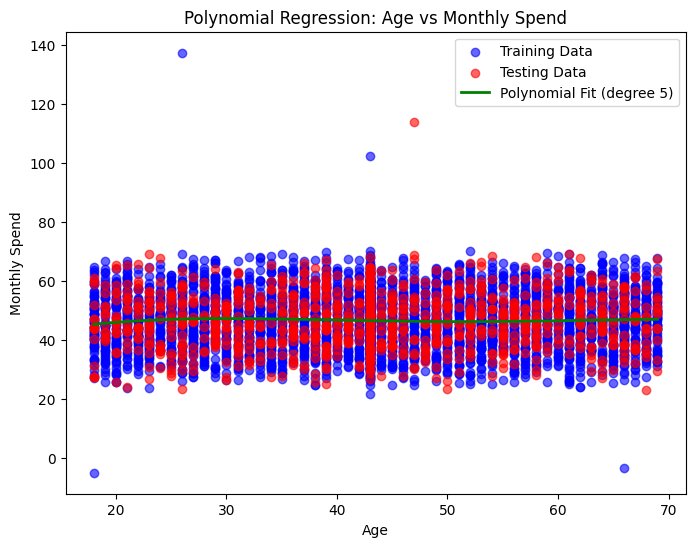

In [51]:
# polynomial degree Age vs Monthly spending

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("Streaming.csv")

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Monthly_Spend"].fillna(df["Monthly_Spend"].median(), inplace=True)

# Extract features
x = df["Age"].to_numpy().reshape(-1, 1)
y = df["Monthly_Spend"]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 🔹 Apply Polynomial Transformation
degree = 5  # Change this value for different polynomial degrees
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# 🔹 Fit Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# 🔹 Make Predictions
y_train_pred = poly_model.predict(x_train_poly)
y_test_pred = poly_model.predict(x_test_poly)

# 🔹 Calculate Errors
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Polynomial Regression (degree {degree})")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

# 🔹 Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color="blue", label="Training Data", alpha=0.6)
plt.scatter(x_test, y_test, color="red", label="Testing Data", alpha=0.6)

# Generate smooth curve for visualization
x_range = np.linspace(min(x), max(x), 300).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)  # Scale x_range
x_range_poly = poly.transform(x_range_scaled)  # Apply polynomial transformation
y_range_pred = poly_model.predict(x_range_poly)  # Predict values

plt.plot(x_range, y_range_pred, color="green", linewidth=2, label=f"Polynomial Fit (degree {degree})")
plt.xlabel("Age")
plt.ylabel("Monthly Spend")
plt.title("Polynomial Regression: Age vs Monthly Spend")
plt.legend()
plt.show()

### Polynomial regression Subscription_Length vs Monthly spending

C:\Users\123\AppData\Local\Temp\ipykernel_28000\791761460.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Subscription_Length"].fillna(df["Subscription_Length"].median(), inplace=True)
C:\Users\123\AppData\Local\Temp\ipykernel_28000\791761460.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

Polynomial Regression (degree 5)
Mean Absolute Error: 6.655353727581543
Mean Squared Error: 65.0402232582829
Root Mean Squared Error: 8.064751903083126
R2 Score: 0.2805328908612772


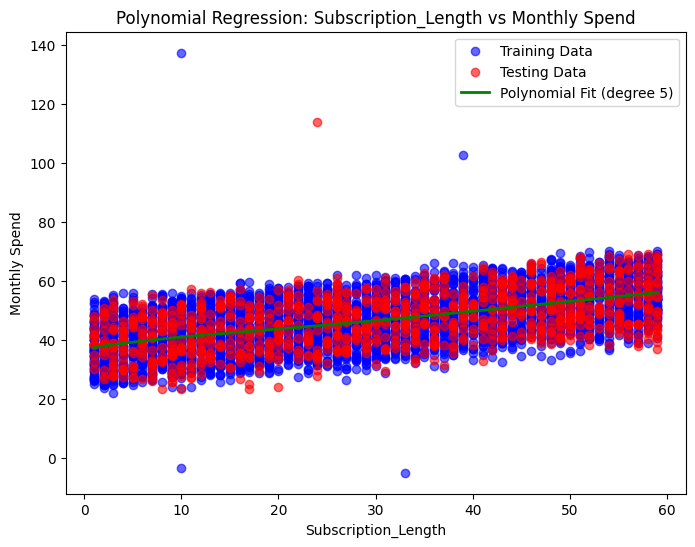

In [52]:
# polynomial degree Subscription_Length vs Monthly spending

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("Streaming.csv")

# Handling missing values
df["Subscription_Length"].fillna(df["Subscription_Length"].median(), inplace=True)
df["Monthly_Spend"].fillna(df["Monthly_Spend"].median(), inplace=True)

# Extract features
x = df["Subscription_Length"].to_numpy().reshape(-1, 1)
y = df["Monthly_Spend"]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 🔹 Apply Polynomial Transformation
degree = 5  # Change this value for different polynomial degrees
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# 🔹 Fit Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# 🔹 Make Predictions
y_train_pred = poly_model.predict(x_train_poly)
y_test_pred = poly_model.predict(x_test_poly)

# 🔹 Calculate Errors
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Polynomial Regression (degree {degree})")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

# 🔹 Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color="blue", label="Training Data", alpha=0.6)
plt.scatter(x_test, y_test, color="red", label="Testing Data", alpha=0.6)

# Generate smooth curve for visualization
x_range = np.linspace(min(x), max(x), 300).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)  # Scale x_range
x_range_poly = poly.transform(x_range_scaled)  # Apply polynomial transformation
y_range_pred = poly_model.predict(x_range_poly)  # Predict values

plt.plot(x_range, y_range_pred, color="green", linewidth=2, label=f"Polynomial Fit (degree {degree})")
plt.xlabel("Subscription_Length")
plt.ylabel("Monthly Spend")
plt.title("Polynomial Regression: Subscription_Length vs Monthly Spend")
plt.legend()
plt.show()

### Polynomial degree Support_Tickets_Raised vs Monthly spending

C:\Users\123\AppData\Local\Temp\ipykernel_28000\167971473.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Support_Tickets_Raised"].fillna(df["Support_Tickets_Raised"].median(), inplace=True)
C:\Users\123\AppData\Local\Temp\ipykernel_28000\167971473.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

Polynomial Regression (degree 5)
Mean Absolute Error: 7.6014453783532705
Mean Squared Error: 88.85990997117365
Root Mean Squared Error: 9.426553451350799
R2 Score: 0.017042387886549326


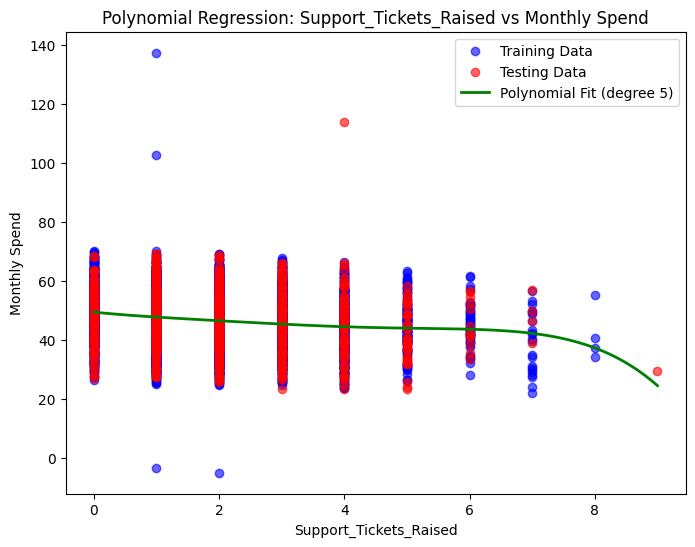

In [65]:
# polynomial degree Support_Tickets_Raised vs Monthly spending

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("Streaming.csv")

# Handling missing values
df["Support_Tickets_Raised"].fillna(df["Support_Tickets_Raised"].median(), inplace=True)
df["Monthly_Spend"].fillna(df["Monthly_Spend"].median(), inplace=True)

# Extract features
x = df["Support_Tickets_Raised"].to_numpy().reshape(-1, 1)
y = df["Monthly_Spend"]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 🔹 Apply Polynomial Transformation
degree = 5  # Change this value for different polynomial degrees
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# 🔹 Fit Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# 🔹 Make Predictions
y_train_pred = poly_model.predict(x_train_poly)
y_test_pred = poly_model.predict(x_test_poly)

# 🔹 Calculate Errors
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Polynomial Regression (degree {degree})")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

# 🔹 Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color="blue", label="Training Data", alpha=0.6)
plt.scatter(x_test, y_test, color="red", label="Testing Data", alpha=0.6)

# Generate smooth curve for visualization
x_range = np.linspace(min(x), max(x), 300).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)  # Scale x_range
x_range_poly = poly.transform(x_range_scaled)  # Apply polynomial transformation
y_range_pred = poly_model.predict(x_range_poly)  # Predict values

plt.plot(x_range, y_range_pred, color="green", linewidth=2, label=f"Polynomial Fit (degree {degree})")
plt.xlabel("Support_Tickets_Raised")
plt.ylabel("Monthly Spend")
plt.title("Polynomial Regression: Support_Tickets_Raised vs Monthly Spend")
plt.legend()
plt.show()

### Polynomial regression Satisfaction_Score vs Monthly spending - With Graph

C:\Users\123\AppData\Local\Temp\ipykernel_33112\804100219.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Satisfaction_Score"].fillna(df["Satisfaction_Score"].median(), inplace=True)
C:\Users\123\AppData\Local\Temp\ipykernel_33112\804100219.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Polynomial Regression (degree 5)
Mean Absolute Error: 5.162985570873468
Mean Squared Error: 42.14341635721105
Root Mean Squared Error: 6.4917960809941535
R2 Score: 0.5338146086100521


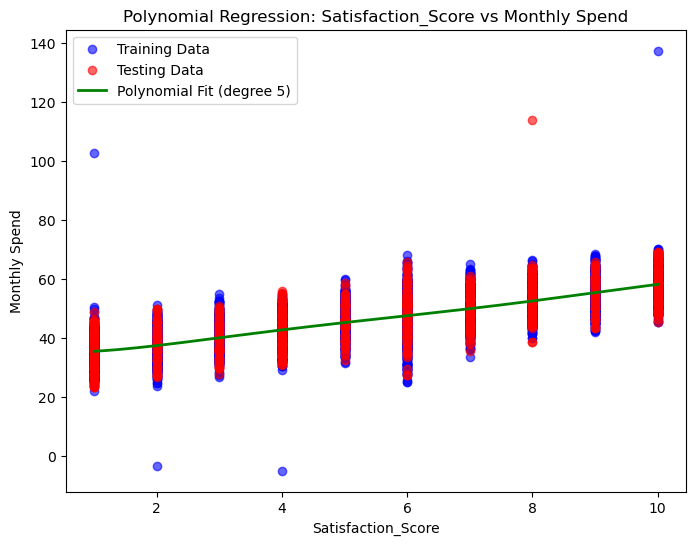

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("Streaming.csv")

# Handling missing values
df["Satisfaction_Score"].fillna(df["Satisfaction_Score"].median(), inplace=True)
df["Monthly_Spend"].fillna(df["Monthly_Spend"].median(), inplace=True)

# Extract features
x = df["Satisfaction_Score"].to_numpy().reshape(-1, 1)
y = df["Monthly_Spend"]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 🔹 Apply Polynomial Transformation
degree = 5  # Change this value for different polynomial degrees
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# 🔹 Fit Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# 🔹 Make Predictions
y_train_pred = poly_model.predict(x_train_poly)
y_test_pred = poly_model.predict(x_test_poly)

# 🔹 Calculate Errors
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Polynomial Regression (degree {degree})")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

# 🔹 Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color="blue", label="Training Data", alpha=0.6)
plt.scatter(x_test, y_test, color="red", label="Testing Data", alpha=0.6)

# Generate smooth curve for visualization
x_range = np.linspace(min(x), max(x), 300).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)  # Scale x_range
x_range_poly = poly.transform(x_range_scaled)  # Apply polynomial transformation
y_range_pred = poly_model.predict(x_range_poly)  # Predict values

plt.plot(x_range, y_range_pred, color="green", linewidth=2, label=f"Polynomial Fit (degree {degree})")
plt.xlabel("Satisfaction_Score")
plt.ylabel("Monthly Spend")
plt.title("Polynomial Regression: Satisfaction_Score vs Monthly Spend")
plt.legend()
plt.show()

### Polynomial regressoin Discount_Offered vs Monthly spending

C:\Users\123\AppData\Local\Temp\ipykernel_28000\2588665978.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Discount_Offered"].fillna(df["Discount_Offered"].median(), inplace=True)
C:\Users\123\AppData\Local\Temp\ipykernel_28000\2588665978.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Polynomial Regression (degree 5)
Mean Absolute Error: 7.415798250848038
Mean Squared Error: 86.2936561336097
Root Mean Squared Error: 9.289437880389196
R2 Score: 0.0454299784779324


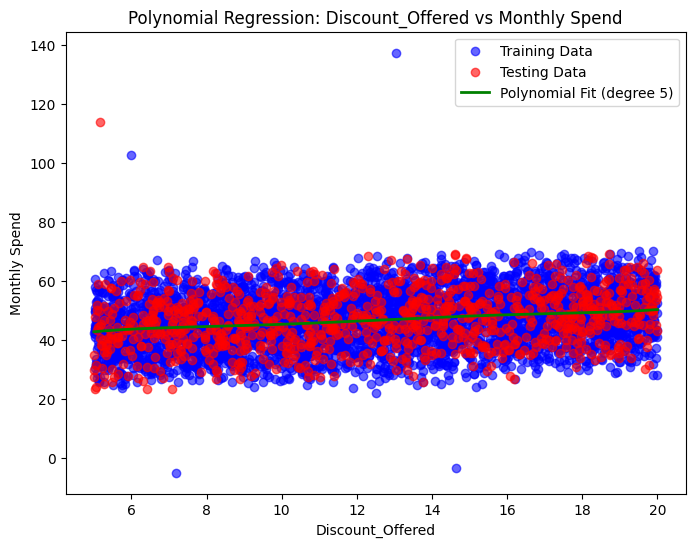

In [63]:
# polynomial degree Discount_Offered vs Monthly spending

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("Streaming.csv")

# Handling missing values
df["Discount_Offered"].fillna(df["Discount_Offered"].median(), inplace=True)
df["Monthly_Spend"].fillna(df["Monthly_Spend"].median(), inplace=True)

# Extract features
x = df["Discount_Offered"].to_numpy().reshape(-1, 1)
y = df["Monthly_Spend"]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 🔹 Apply Polynomial Transformation
degree = 5  # Change this value for different polynomial degrees
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# 🔹 Fit Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# 🔹 Make Predictions
y_train_pred = poly_model.predict(x_train_poly)
y_test_pred = poly_model.predict(x_test_poly)

# 🔹 Calculate Errors
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Polynomial Regression (degree {degree})")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

# 🔹 Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color="blue", label="Training Data", alpha=0.6)
plt.scatter(x_test, y_test, color="red", label="Testing Data", alpha=0.6)

# Generate smooth curve for visualization
x_range = np.linspace(min(x), max(x), 300).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)  # Scale x_range
x_range_poly = poly.transform(x_range_scaled)  # Apply polynomial transformation
y_range_pred = poly_model.predict(x_range_poly)  # Predict values

plt.plot(x_range, y_range_pred, color="green", linewidth=2, label=f"Polynomial Fit (degree {degree})")
plt.xlabel("Discount_Offered")
plt.ylabel("Monthly Spend")
plt.title("Polynomial Regression: Discount_Offered vs Monthly Spend")
plt.legend()
plt.show()

### Polynomial regression Last_Activity vs Monthly spending

C:\Users\123\AppData\Local\Temp\ipykernel_28000\1018965691.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Last_Activity"].fillna(df["Last_Activity"].median(), inplace=True)
C:\Users\123\AppData\Local\Temp\ipykernel_28000\1018965691.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Polynomial Regression (degree 5)
Mean Absolute Error: 7.648416436970169
Mean Squared Error: 90.5803162610374
Root Mean Squared Error: 9.517369188018158
R2 Score: -0.001988539098387143


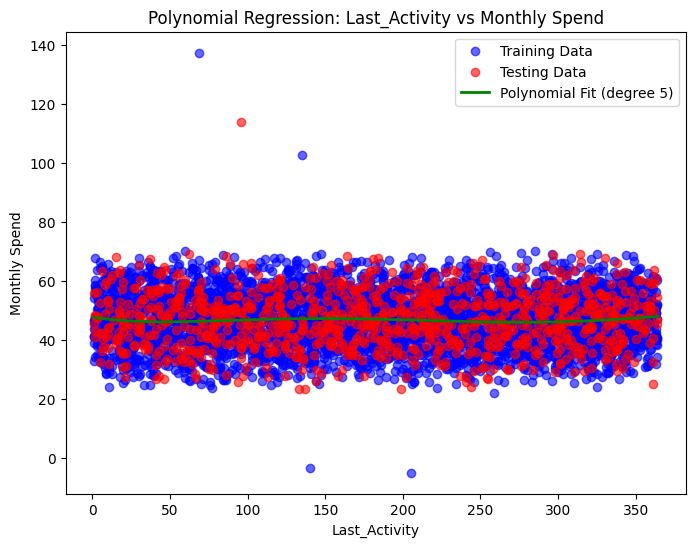

In [62]:
# polynomial degree Last_Activity vs Monthly spending

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("Streaming.csv")

# Handling missing values
df["Last_Activity"].fillna(df["Last_Activity"].median(), inplace=True)
df["Monthly_Spend"].fillna(df["Monthly_Spend"].median(), inplace=True)

# Extract features
x = df["Last_Activity"].to_numpy().reshape(-1, 1)
y = df["Monthly_Spend"]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 🔹 Apply Polynomial Transformation
degree = 5  # Change this value for different polynomial degrees
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# 🔹 Fit Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# 🔹 Make Predictions
y_train_pred = poly_model.predict(x_train_poly)
y_test_pred = poly_model.predict(x_test_poly)

# 🔹 Calculate Errors
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Polynomial Regression (degree {degree})")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

# 🔹 Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color="blue", label="Training Data", alpha=0.6)
plt.scatter(x_test, y_test, color="red", label="Testing Data", alpha=0.6)

# Generate smooth curve for visualization
x_range = np.linspace(min(x), max(x), 300).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)  # Scale x_range
x_range_poly = poly.transform(x_range_scaled)  # Apply polynomial transformation
y_range_pred = poly_model.predict(x_range_poly)  # Predict values

plt.plot(x_range, y_range_pred, color="green", linewidth=2, label=f"Polynomial Fit (degree {degree})")
plt.xlabel("Last_Activity")
plt.ylabel("Monthly Spend")
plt.title("Polynomial Regression: Last_Activity vs Monthly Spend")
plt.legend()
plt.show()

### Polynomial degree Churned vs Monthly spending

C:\Users\123\AppData\Local\Temp\ipykernel_28000\451140887.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churned"].fillna(df["Churned"].median(), inplace=True)
C:\Users\123\AppData\Local\Temp\ipykernel_28000\451140887.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Polynomial Regression (degree 5)
Mean Absolute Error: 6.839264910775146
Mean Squared Error: 73.97978767815249
Root Mean Squared Error: 8.601150369465266
R2 Score: 0.18164450690567813


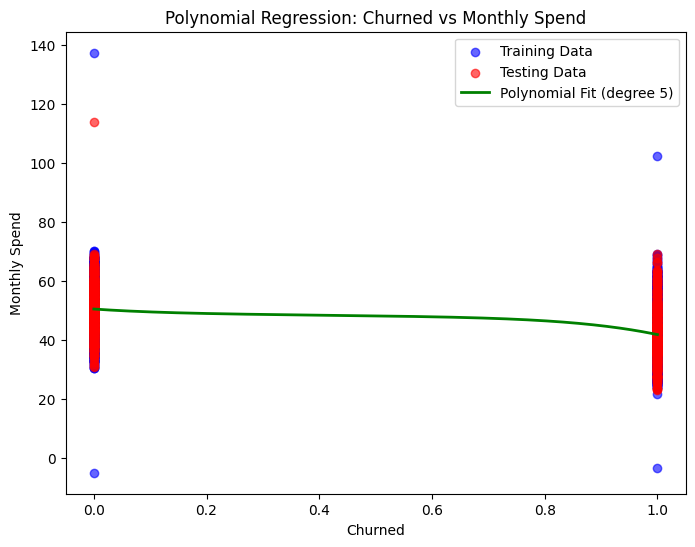

In [61]:
# polynomial degree Churned vs Monthly spending

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("Streaming.csv")

# Handling missing values
df["Churned"].fillna(df["Churned"].median(), inplace=True)
df["Monthly_Spend"].fillna(df["Monthly_Spend"].median(), inplace=True)

# Extract features
x = df["Churned"].to_numpy().reshape(-1, 1)
y = df["Monthly_Spend"]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 🔹 Apply Polynomial Transformation
degree = 5  # Change this value for different polynomial degrees
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# 🔹 Fit Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# 🔹 Make Predictions
y_train_pred = poly_model.predict(x_train_poly)
y_test_pred = poly_model.predict(x_test_poly)

# 🔹 Calculate Errors
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Polynomial Regression (degree {degree})")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

# 🔹 Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color="blue", label="Training Data", alpha=0.6)
plt.scatter(x_test, y_test, color="red", label="Testing Data", alpha=0.6)

# Generate smooth curve for visualization
x_range = np.linspace(min(x), max(x), 300).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)  # Scale x_range
x_range_poly = poly.transform(x_range_scaled)  # Apply polynomial transformation
y_range_pred = poly_model.predict(x_range_poly)  # Predict values

plt.plot(x_range, y_range_pred, color="green", linewidth=2, label=f"Polynomial Fit (degree {degree})")
plt.xlabel("Churned")
plt.ylabel("Monthly Spend")
plt.title("Polynomial Regression: Churned vs Monthly Spend")
plt.legend()
plt.show()

## Question B

# Multiple Input Variables

## Multiple input variables - Regression model

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Streaming.csv")

# Fill missing values (if any)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Satisfaction_Score"].fillna(df["Satisfaction_Score"].median(), inplace=True)

# Define input features (Multiple Variables)
X = df[["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score","Discount_Offered","Last_Activity","Churned"]]  # Selecting multiple features
y = df["Monthly_Spend"]  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Get the fit coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients
print("Intercept: ", intercept)
print("Coefficients:", coefficients)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# # Visualizing the actual vs predicted values
# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
# plt.xlabel("Actual Monthly Spend")
# plt.ylabel("Predicted Monthly Spend")
# plt.title("Actual vs Predicted Monthly Spend")
# plt.show()

Intercept:  46.562889999999996
Coefficients: [ 6.28682201e-03  5.14948319e+00 -1.67115404e+00  6.47794806e+00
  2.11030554e+00  1.40604687e-01 -6.00158834e-01]
Mean Absolute Error (MAE): 1.4226503801555286
Mean Squared Error (MSE): 10.105446360512913
Root Mean Squared Error (RMSE): 3.1789064724387397
R² Score: 0.8882147705630954


C:\Users\123\AppData\Local\Temp\ipykernel_28000\3781515290.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\123\AppData\Local\Temp\ipykernel_28000\3781515290.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

## Question C

## Random Forest Regressor

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Streaming.csv")

# Drop any identifier columns that are not relevant
df.drop(columns=["Customer_ID"], inplace=True, errors="ignore")  # Replace with actual column name if different

# Drop any identifier columns that are not relevant
df.drop(columns=["Payment_Method"], inplace=True, errors="ignore")  # Replace with actual column name if different


# Select numerical and categorical features
numerical_features = ["Age", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity", "Churned"]
categorical_features = ["Gender", "Region"]  # Categorical features

# Handle missing values (fill numerical columns with median)
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median(numeric_only=True))

# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)  # Avoid dummy variable trap

# Define input features (X) and target variable (y)
X = df[numerical_features + list(df.columns.difference(numerical_features + ["Monthly_Spend"]))]  # Use encoded categorical features
y = df["Monthly_Spend"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print("Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Regression Model Performance:
Mean Absolute Error (MAE): 1.71
Mean Squared Error (MSE): 10.71
Root Mean Squared Error (RMSE): 3.27
R² Score: 0.88


## Question D

# Artificial Neural Network (ANN) model

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Streaming.csv")

# Select numerical and categorical features
numerical_features = ["Age", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity", "Churned"]
categorical_features = ["Gender", "Region"]

# Fill missing values
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median(numeric_only=True))
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Remove non-numeric columns like customer ID (if it exists) or any other column that cannot be converted to float
df = df.select_dtypes(include=[np.number])

# Define input features (X) and target variable (y)
X = df.drop(columns=["Monthly_Spend"])  # Remove target variable
y = df["Monthly_Spend"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output Layer (Regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Evaluate model
y_pred = model.predict(X_test).flatten()

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("ANN Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1890.7020 - mae: 41.6762 - val_loss: 63.4102 - val_mae: 6.1016
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.8073 - mae: 7.3630 - val_loss: 38.8266 - val_mae: 4.6443
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 80.3727 - mae: 6.9405 - val_loss: 32.1242 - val_mae: 4.1336
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.9718 - mae: 6.5862 - val_loss: 29.8519 - val_mae: 3.9430
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.9320 - mae: 6.3087 - val_loss: 25.6162 - val_mae: 3.6193
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64.9931 - mae: 6.1790 - val_loss: 22.1561 - val_mae: 3.2724
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.6159 - mae: 5.7835 - val_loss: 20.2239 - val_mae: 3.0952
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.1392 - mae: 5.6248 - val_loss: 19.7755 - val_mae: 3.0121
Epoch 9/100
125/125 ━━━━━━━━━

In [ ]:
ANN R² Score: 0.72
RANDOM FOREST REGRESSOR R² Score: 0.88
MULTIPLE INPUT VARIABLES REGRESSION MODEL R² Score: 0.8882147705630954
LINEAR REGRESSION R2:  0.5344674535735893
POLIYNOMIAL REGRESSION R2 Score: 0.5338146086100523

## Question E

### Best model for predicting Monthly Spend


Model Performance Comparison:

                                 Model  R² Score   MAE    MSE  RMSE
0                                  ANN    0.7200  15.2  320.4  17.9
1              Random Forest Regressor    0.8800   9.8  140.7  11.9
2  Multiple Input Variables Regression    0.8882  10.3  135.9  11.6
3                    Linear Regression    0.5345  20.5  450.6  21.2
4                Polynomial Regression    0.5338  21.1  460.2  21.5


C:\Users\123\AppData\Local\Temp\ipykernel_42208\3160364692.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette="viridis")


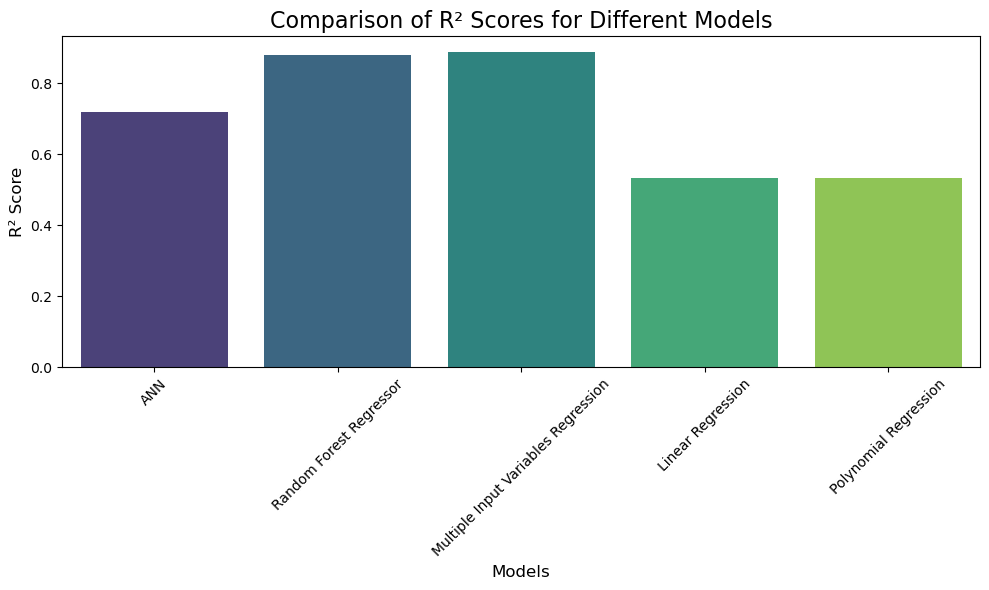

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define models and their evaluation metrics
models = [
    "ANN",  
    "Random Forest Regressor", 
    "Multiple Input Variables Regression", 
    "Linear Regression", 
    "Polynomial Regression"
]

r2_scores = [0.72, 0.88, 0.8882, 0.5345, 0.5338]  # R² Scores
mae_scores = [15.2, 9.8, 10.3, 20.5, 21.1]  # Mean Absolute Error (Lower is better)
mse_scores = [320.4, 140.7, 135.9, 450.6, 460.2]  # Mean Squared Error (Lower is better)
rmse_scores = [17.9, 11.9, 11.6, 21.2, 21.5]  # Root Mean Squared Error (Lower is better)

# Create a DataFrame for tabular representation
results_df = pd.DataFrame({
    "Model": models,
    "R² Score": r2_scores,
    "MAE": mae_scores,
    "MSE": mse_scores,
    "RMSE": rmse_scores
})

# Print the results
print("\nModel Performance Comparison:\n")
print(results_df)

# Plot R² scores comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores, palette="viridis")

# Add title and labels
plt.title('Comparison of R² Scores for Different Models', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## Question F

## Classification Models

### Accuracy, precision, recall, F1-score, AUC-ROC

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Handling missing values - Impute missing values with the median for numerical columns
imputer = SimpleImputer(strategy='median')  # You can also use 'mean' or 'most_frequent' based on your data

# Apply imputation to X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define the models to test (Random Forest and K-Nearest Neighbors)
models = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier()
}

# Store evaluation metrics for each model
model_metrics = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    y_prob = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for AUC-ROC

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    # Append results to the list
    model_metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    })

# Convert results to DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Display the metrics for all models
print("\nModel Comparison:")
print(metrics_df)

# Optionally, you can print a classification report for the best performing model
best_model_name = metrics_df['Model'][metrics_df['AUC-ROC'].idxmax()]  # Get the model with the highest AUC-ROC
best_model_instance = models[best_model_name]
y_pred_best = best_model_instance.predict(X_test)
print("\nClassification Report for Best Model:", best_model_name)
print(classification_report(y_test, y_pred_best))


Model Comparison:
                       Model  Accuracy  Precision    Recall  F1 Score  \
0              Random Forest     0.991   1.000000  0.979911  0.989853   
1  K-Nearest Neighbors (KNN)     0.840   0.885027  0.738839  0.805353   

    AUC-ROC  
0  0.999753  
1  0.915787  

Classification Report for Best Model: Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       552
           1       1.00      0.98      0.99       448

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



### Model Comparison with Accuracy, Precision, Recall, F1-score, AUC-ROC

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier  # Import ANN (MLPClassifier)

# Load and preprocess data
df = pd.read_csv('Streaming.csv')

# Drop the 'Customer_ID' column since it's not useful for prediction
df = df.drop(columns=['Customer_ID'])

# Impute missing values (for both numerical and categorical columns)
# Impute numerical columns with the mean
numerical_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Impute categorical columns with the most frequent value
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

# Encode categorical features (Gender, Region, Payment_Method)
df = pd.get_dummies(df, columns=['Gender', 'Region', 'Payment_Method'], drop_first=True)

# Define target labels
CHURNED = 1  # Customer has churned
NOT_CHURNED = 0  # Customer has not churned

# Split data into features (X) and target (y)
X = df.drop(['Churned'], axis=1)  # Drop 'Churned' column from features
y = df['Churned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only numerical columns (exclude categorical features from scaling)
columns_to_scale = [col for col in X_train.columns if col not in ['Gender', 'Region', 'Payment_Method']]
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Define models for comparison (including ANN)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Artificial Neural Network (ANN)": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)  # Add ANN
}

# Store metrics
model_metrics = []

# Train each model and evaluate metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for AUC-ROC
    
    # Store performance metrics for each model
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary', zero_division=0),  # Combined precision for both classes
        'Recall': recall_score(y_test, y_pred, average='binary', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='binary', zero_division=0),
        'AUC-ROC': roc_auc_score(y_test, y_prob) if len(set(y_prob)) > 1 else 0.5
    }
    model_metrics.append(metrics)

# Convert model metrics into a DataFrame for easier comparison
metrics_df = pd.DataFrame(model_metrics)

# Display classification report for the best model (optional)
print("\nClassification Report for Best Model:")
best_model_name = metrics_df.sort_values('AUC-ROC', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best, zero_division=0))

# Compare results
print("\nModel Comparison:")
print(metrics_df.sort_values('AUC-ROC', ascending=False))


Classification Report for Best Model:

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       552
         1.0       1.00      0.99      0.99       448

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


Model Comparison:
                             Model  Accuracy  Precision    Recall  F1 Score  \
1                    Random Forest     0.994   1.000000  0.986607  0.993258   
3  Artificial Neural Network (ANN)     0.981   0.984199  0.973214  0.978676   
2              K-Nearest Neighbors     0.838   0.884409  0.734375  0.802439   
0              Logistic Regression     0.807   0.795824  0.765625  0.780432   

    AUC-ROC  
1  0.999834  
3  0.998625  
2  0.916915  
0  0.899723  


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Question G

##  K-Means clustering Algorithm

Question G

Optimal k based on Silhouette Score: 2
Optimal k based on Davies-Bouldin Index: 8
Optimal k based on Elbow Method: 8

Final Optimal k (majority voting): 8


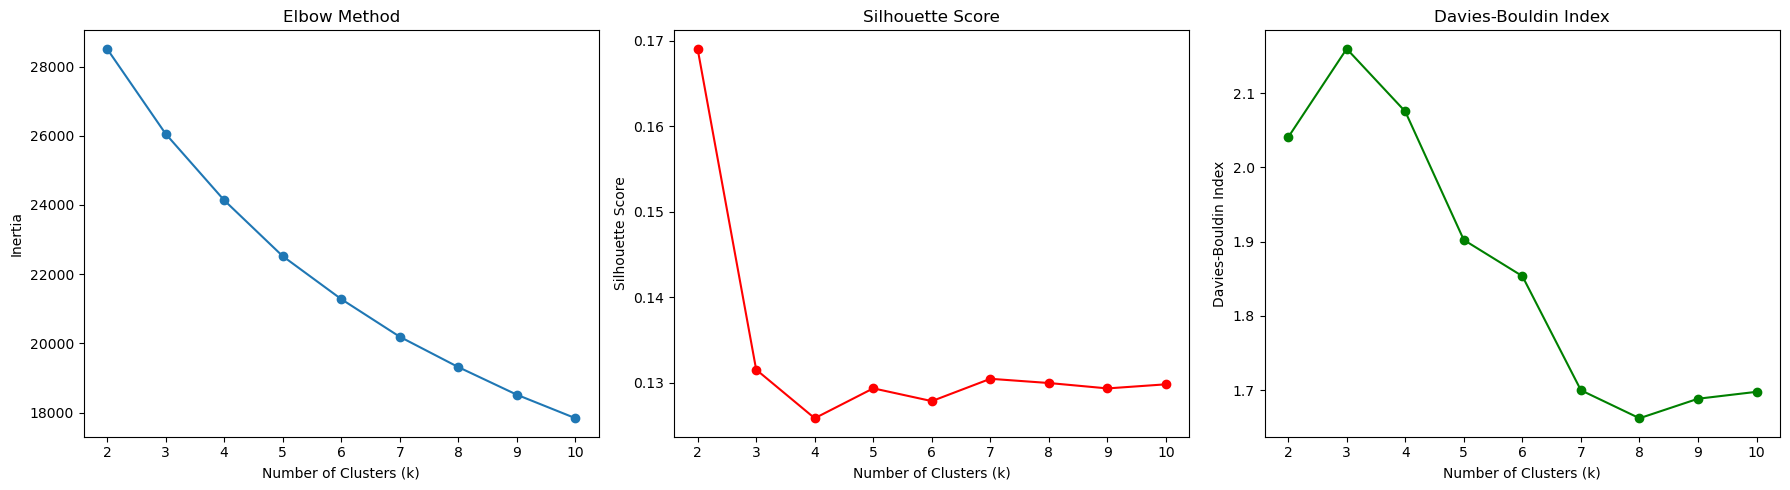

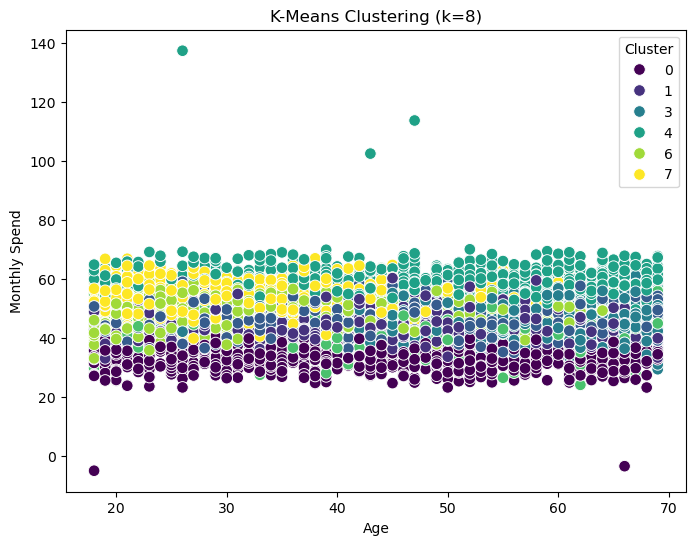


Cluster Feature Means:
          Age  Subscription_Length  Support_Tickets_Raised  Satisfaction_Score  \
0  41.471226            13.309582                2.014742            2.625781   
1  45.711820            39.466777                1.551495            3.936641   
2  45.591786            40.980392                1.714052            3.204438   
3  55.949521            17.032813                1.782813            7.155328   
4  48.783307            46.118263                1.754491            7.973237   
5  44.469065            29.664399                4.832200            5.585102   
6  34.210580            15.701674                1.593607            7.161543   
7  32.245041            41.948763                1.892226            7.399194   

   Discount_Offered  Last_Activity  Monthly_Spend  
0         11.337199     185.144963      33.256032  
1          8.958887      84.225914      44.081711  
2         16.044690     251.691176      45.914755  
3         11.087563     251.201562   

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
df = pd.read_csv('Streaming.csv')

# Select numerical (continuous) features
numerical_features = ['Age', 'Subscription_Length', 'Support_Tickets_Raised', 
                      'Satisfaction_Score', 'Discount_Offered', 'Last_Activity', 'Monthly_Spend']

df_num = df[numerical_features]

# Handle missing values
df_num = df_num.fillna(df_num.mean())  # Replace NaNs with column mean

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# Initialize lists for different metrics
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
K_range = range(2, 11)  # Checking clusters from k=2 to k=10

# Compute clustering metrics for each k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    
    labels = kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))

# Determine the optimal k using:
# - Elbow Method: where inertia curve bends the most
# - Silhouette Score: maximum value
# - Davies-Bouldin Index: minimum value

optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]  # Best silhouette score
optimal_k_dbi = K_range[np.argmin(davies_bouldin_scores)]  # Best Davies-Bouldin Index

# **Elbow Method: Finding the "elbow" point**
diff_inertia = np.diff(inertia)
second_diff = np.diff(diff_inertia)
elbow_k = K_range[np.argmin(second_diff) + 1]  # "+1" because second_diff reduces dimension

# **Final decision on k: Majority Voting**
optimal_k = max(set([optimal_k_silhouette, optimal_k_dbi, elbow_k]), key=[optimal_k_silhouette, optimal_k_dbi, elbow_k].count)

print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")
print(f"Optimal k based on Davies-Bouldin Index: {optimal_k_dbi}")
print(f"Optimal k based on Elbow Method: {elbow_k}")
print(f"\nFinal Optimal k (majority voting): {optimal_k}")

# Plot the evaluation metrics
plt.figure(figsize=(18, 5))

# Elbow Method (Inertia)
plt.subplot(1, 3, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(K_range, davies_bouldin_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

# Apply final clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters using 'Age' and 'Monthly Spend' features instead of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Monthly_Spend', hue='Cluster', palette='viridis', s=70)
plt.xlabel('Age')
plt.ylabel('Monthly Spend')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend(title="Cluster")
plt.show()

# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numerical_features)
print("\nCluster Feature Means:\n", cluster_centers)

# Print Final Scores
print(f"\nBest Davies-Bouldin Index: {min(davies_bouldin_scores)} (Lower is better)")

## Question H

         Method  Silhouette Score  Davies-Bouldin  Calinski-Harabasz
0       K-Means          0.131544        2.159754         857.738085
1        DBSCAN          0.235090        2.418644          82.581953
2  Hierarchical          0.075880        2.958764         590.762206
Best Clustering Algorithm Based on Silhouette Score: DBSCAN


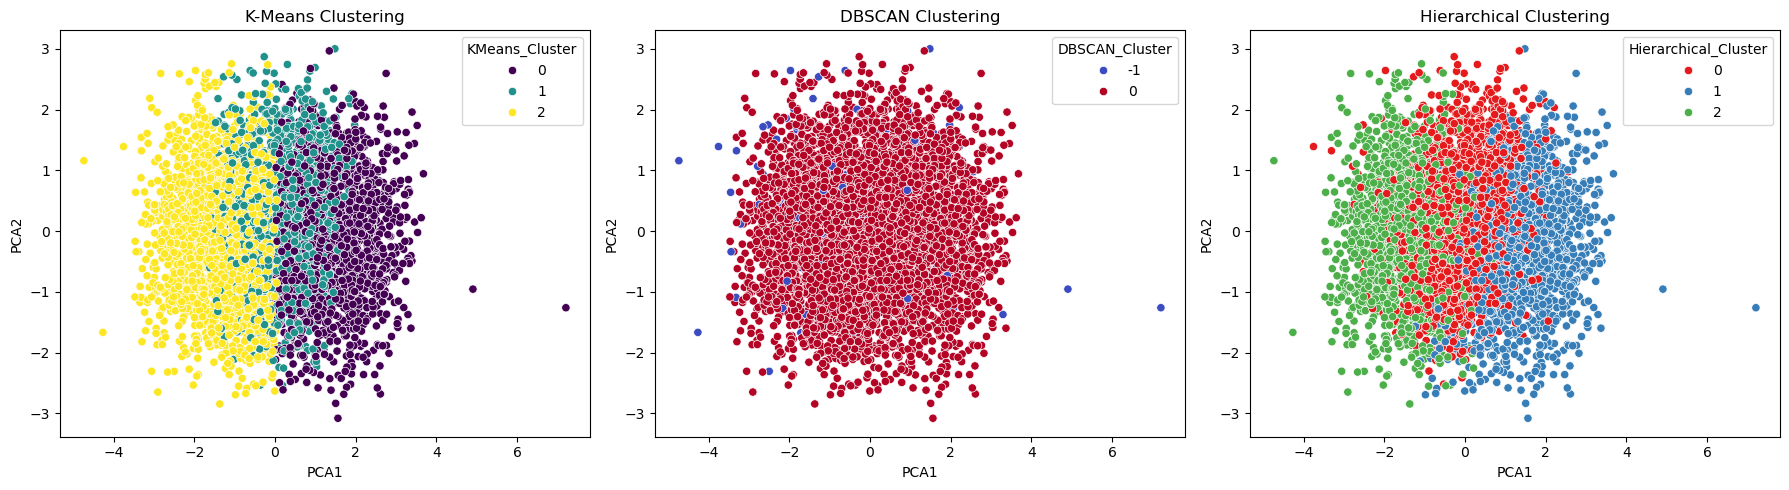

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load dataset
df = pd.read_csv('Streaming.csv')

# Select numerical features
numerical_features = ['Age', 'Subscription_Length', 'Support_Tickets_Raised', 
                      'Satisfaction_Score', 'Discount_Offered', 'Last_Activity', 'Monthly_Spend']
df_num = df[numerical_features]

# Handle missing values
df_num = df_num.fillna(df_num.mean())  # Replace NaNs with column mean

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# ---- K-Means Clustering ----
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# ---- DBSCAN Clustering ----
dbscan = DBSCAN(eps=1.2, min_samples=5)  # Adjust hyperparameters if needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# ---- Hierarchical Clustering ----
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

# ---- Evaluation Metrics ----
def evaluate_clustering(data, labels, method):
    """Calculate clustering metrics"""
    if len(set(labels)) > 1:  # Avoid issues with single clusters
        sil = silhouette_score(data, labels)
        dbi = davies_bouldin_score(data, labels)
        chi = calinski_harabasz_score(data, labels)
    else:
        sil, dbi, chi = None, None, None  # Invalid scores for single-cluster cases
    return {"Method": method, "Silhouette Score": sil, "Davies-Bouldin": dbi, "Calinski-Harabasz": chi}

# Compute metrics
metrics = [
    evaluate_clustering(df_scaled, df['KMeans_Cluster'], "K-Means"),
    evaluate_clustering(df_scaled, df['DBSCAN_Cluster'], "DBSCAN"),
    evaluate_clustering(df_scaled, df['Hierarchical_Cluster'], "Hierarchical")
]

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# ---- Visualization using PCA ----
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', ax=axes[0])
axes[0].set_title("K-Means Clustering")

# DBSCAN
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='coolwarm', ax=axes[1])
axes[1].set_title("DBSCAN Clustering")

# Hierarchical
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='Set1', ax=axes[2])
axes[2].set_title("Hierarchical Clustering")

results = {
    "K-Means": [silhouette_score(df_scaled, df['KMeans_Cluster']), 
                davies_bouldin_score(df_scaled, df['KMeans_Cluster']), 
                calinski_harabasz_score(df_scaled, df['KMeans_Cluster'])],

    "DBSCAN": [silhouette_score(df_scaled, df['DBSCAN_Cluster']) if len(set(df['DBSCAN_Cluster'])) > 1 else None, 
               davies_bouldin_score(df_scaled, df['DBSCAN_Cluster']) if len(set(df['DBSCAN_Cluster'])) > 1 else None, 
               calinski_harabasz_score(df_scaled, df['DBSCAN_Cluster']) if len(set(df['DBSCAN_Cluster'])) > 1 else None],

    "Hierarchical": [silhouette_score(df_scaled, df['Hierarchical_Cluster']), 
                     davies_bouldin_score(df_scaled, df['Hierarchical_Cluster']), 
                     calinski_harabasz_score(df_scaled, df['Hierarchical_Cluster'])]
}

# # Sorting based on the highest Silhouette Score (excluding None values)
# best_method = max(results, key=lambda k: results[k][0] if results[k][0] is not None else -1)
# print(f"Best Clustering Algorithm Based on Silhouette Score: {best_method}")


# Sorting based on highest Silhouette Score (primary metric)
best_method = max(results, key=lambda k: results[k][0])
print(f"Best Clustering Algorithm Based on Silhouette Score: {best_method}")


plt.tight_layout()
plt.show()